In [9]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
from scipy.stats import shapiro, kruskal, levene
import numpy as np
from statsmodels.stats import oneway
%matplotlib widget

<h1 style="text-align: center;">MDI & SMDI Analysis</h1>


In [10]:
master_smdi = pd.read_csv('smdi_results/master_smdi.csv').dropna()
master_mdi = pd.read_csv('mdi_results/master_mdi.csv')

<h2>SMDI Visualization</h2>

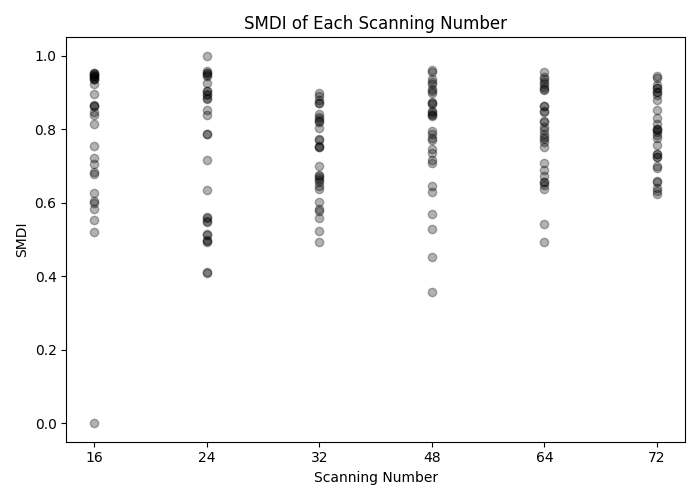

In [11]:
smdi_scatter, axis = plt.subplots(1,1, figsize=(7,5))
smdi_scatter.canvas.header_visible = False

xtl = [16, 24, 32, 48, 64, 72]
xt = [i for i in range(len(xtl))]

for tick, col in zip(xt, master_smdi.columns):
    y = master_smdi[col]
    axis.scatter([tick]*len(y), y,
                 alpha=0.3,
                 color='black')

axis.set(title='SMDI of Each Scanning Number',
         xlabel='Scanning Number',
         ylabel='SMDI',
         xticks=xt,
         xticklabels=xtl)

smdi_scatter.tight_layout()

<h2>MDI Visualization</h2>

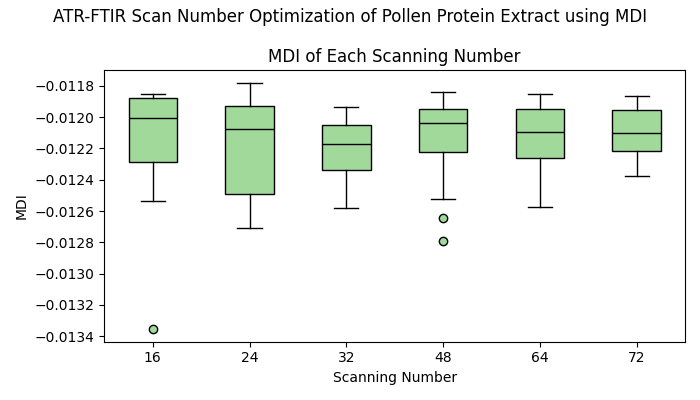

In [21]:
mdi_box, axis = plt.subplots(1,1, figsize=(7,4))
mdi_box.canvas.header_visible = False
mdi_box.suptitle("ATR-FTIR Scan Number Optimization of Pollen Protein Extract using MDI")

pooled_mdi_data = [master_mdi[col].dropna() for col in master_mdi.columns]
mdi_plot = axis.boxplot(x=pooled_mdi_data,
             medianprops={'color':'black'},
             flierprops={'markerfacecolor':'#a1d99b'},
             patch_artist=True)
axis.set(title='MDI of Each Scanning Number',
         xlabel='Scanning Number',
         ylabel='MDI',
         xticklabels=[16,24,32,48,64,72])

for box in mdi_plot['boxes']:
    box.set(facecolor="#a1d99b")

mdi_box.tight_layout()

<h2>Statistical Analyses</h2>

In [13]:
mdi_groups = [master_mdi[col].dropna() for col in master_mdi.columns]
alpha = 0.05

<h3>Test for Normality (Shapiro-Wilk Test)</h3>

In [14]:
scan_no =[16,24,32,48,64,72]
for no, group in zip(scan_no, mdi_groups):

    shapiro_test = shapiro(group, nan_policy='omit')

    s_normal = True
    if shapiro_test.pvalue < alpha: s_normal = False

    print(f'Scan No. Analyzed: {no} \t Normality: {s_normal} \t Statistic: {shapiro_test.statistic:.2f} \t p-Value: {shapiro_test.pvalue:.2E}')

Scan No. Analyzed: 16 	 Normality: False 	 Statistic: 0.78 	 p-Value: 2.86E-05
Scan No. Analyzed: 24 	 Normality: False 	 Statistic: 0.86 	 p-Value: 1.29E-03
Scan No. Analyzed: 32 	 Normality: True 	 Statistic: 0.95 	 p-Value: 1.81E-01
Scan No. Analyzed: 48 	 Normality: False 	 Statistic: 0.89 	 p-Value: 4.76E-03
Scan No. Analyzed: 64 	 Normality: True 	 Statistic: 0.94 	 p-Value: 1.17E-01
Scan No. Analyzed: 72 	 Normality: True 	 Statistic: 0.95 	 p-Value: 1.40E-01


<h3>Test for Homogeneity of Variances (Levene's Test)</h3>

In [15]:
levene_test = levene(*mdi_groups, nan_policy='omit')
l_homo_var = True
if levene_test.pvalue < alpha: l_homo_var = False

print(f'Scan Number Analyzed: 16, 24, 32, 48, 64, 72 \t Homoscedasticity: {l_homo_var} \t Statistic: {levene_test.statistic:.2f} \t p-Value: {levene_test.pvalue:.2f}')

Scan Number Analyzed: 16, 24, 32, 48, 64, 72 	 Homoscedasticity: False 	 Statistic: 3.33 	 p-Value: 0.01


<h3>Group Comparison (Kruskal-Wallis Test)</h3>

In [16]:
kruskal_test = kruskal(*mdi_groups)
k_sig_dif = False
if kruskal_test.pvalue < alpha: k_sig_dif = True
print(f'Scan Number Analyzed: 16, 24, 32, 48, 64, 72 \t Significant Difference: {k_sig_dif} \t Statistic: {kruskal_test.statistic:.2f} \t p-Value: {kruskal_test.pvalue:.2f}')


Scan Number Analyzed: 16, 24, 32, 48, 64, 72 	 Significant Difference: False 	 Statistic: 6.60 	 p-Value: 0.25
